In [177]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null
import random
import numpy as np
import networkx as nx
from sys import maxsize
from itertools import permutations
from algorithmic_complexity.aclib import graphstuff as gs
from math import acos,cos,sin,radians
from cmath import sqrt
import math

In [197]:
lista_todos=[]
#lista_distritos=[]
#lista_centro_poblados=[]
def read_lines(linea:str,lista):
  atributo=linea.split(",")
  place=[atributo[0],atributo[1],atributo[2],atributo[3],float(atributo[4]),float(atributo[5])]
  lista.append(place)
def mostrar_departamentos(lista):
  for i in lista:
    print(i)
def leer_hoja(lista):
  text_name="ubicaciones.txt"  
  with open(text_name)as obj:
    for line in obj:
      read_lines(line,lista)
def distancia_puntos(punto_1,punto_2):
  #p1 = (radians(punto_1[4]),radians(punto_1[5]))
  #p2 = (radians(punto_2[4]),radians(punto_2[5]))
  #distancia = acos(sin(p1[0])*sin(p2[0])+ cos(p1[0]) * cos(p2[0])*cos(p1[1]-p2[1]))
  #return distancia*6371.01
  p1 = (punto_1[4],punto_1[5])
  p2 = (punto_2[4],punto_2[5])
  d=(p1[0]-p2 [0])**2+(p1[1]-p2 [1])**2
  distancia = math.sqrt(d)
  return distancia
  

def agregar_todos_distritos(departamento,provincia,lista_t,lista_d):
  conjunto=[]
  for i in range(len(lista_t)):
    if (departamento==lista_t[i][0] and provincia==lista_t[i][1]):
      lista_d.append(lista_t[i])
      conjunto.append(lista_t[i][2]) 
  return conjunto

def TSP(graph, s):
    vertex = []
    for i in range(len(graph)):
        if i != s:
            vertex.append(i)
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)
    return min_path
def Retonar_Conjunto(pos,depart,lista):
  lista_ub=[]
  for i in range(len(lista)):
    if depart==lista[i][0]:
      lista_ub.append(lista[i][pos])
  return lista_ub

def Agregar_a_lista_CP(lista_todos,lista_centros,distrit):
  for i in range(len(lista_todos)):
    if distrit==lista_todos[i][2]:
      lista_centros.append(lista_todos[i])  

def agregar_distritos_a_lista_ordenada(cantidad,lista_d,lista_ordenada,lista_nombres_d):
  for i in range(len(lista_d)):
    for j in range(cantidad):
      if (lista_d[i][2]==lista_nombres_d[j]):
        lista_ordenada[j].append(lista_d[i])

leer_hoja(lista_todos)


In [179]:
#@title Departamento
#@markdown Seleccione un departamento
departamento = "TUMBES"  #@param ["AMAZONAS","ANCASH","APURIMAC","AREQUIPA","AYACUCHO","CAJAMARCA","CUSCO","HUANCAVELICA","HUANUCO","ICA","JUNIN","LA LIBERTAD","LAMBAYEQUE","LIMA","LORETO","MADRE DE DIOS","MOQUEGUA","PASCO","PIURA","PUNO","SAN MARTIN","TACNA","TUMBES","UCAYALI"]


In [180]:
# MUESTRA TODAS LAS PROVINCIAS DEL DEPARTAMENTO
Conjunto=Retonar_Conjunto(1,departamento,lista_todos)
print(set(Conjunto))

{'CONTRALMIRANTE VILLAR', 'TUMBES', 'ZARUMILLA'}


In [181]:
#@title Provincia
#@markdown seleccione una provincia del conjunto de provincias:
provincia = 'ZARUMILLA'  #@param {type: "string"}


In [182]:
lista_distrit=[]
conjunto_de_distritos=agregar_todos_distritos(departamento,provincia,lista_todos,lista_distrit)
conjunto_de_nombres_distritos=set(conjunto_de_distritos)
lista_de_nombres_distritos= list (conjunto_de_nombres_distritos)
cantidad_de_distritos=len(set(conjunto_de_distritos))
lista_ordenada_de_distritos=[[]for i in range(cantidad_de_distritos)]
agregar_distritos_a_lista_ordenada(cantidad_de_distritos,lista_distrit,lista_ordenada_de_distritos,lista_de_nombres_distritos)

#MUESTRA UNA LISTA CON MAS LISTAS INCORPORADAS, CADA LISTA INCORPORARDA TIENE LOS DATOS DE LOS CENTROS POBLADOS QUE HAY EN UN DISTRITO (DENTRO DE LA PROVINCIA SELECCIONADA)
for i in lista_ordenada_de_distritos:
  print(i)

[['TUMBES', 'ZARUMILLA', 'ZARUMILLA', 'EL BENDITO', -3.451218, -80.316448], ['TUMBES', 'ZARUMILLA', 'ZARUMILLA', 'VILLA PRIMAVERA', -3.512058, -80.308445], ['TUMBES', 'ZARUMILLA', 'ZARUMILLA', 'ZARUMILLA', -3.501209, -80.275564]]
[['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'EL GRAN CEIBO', -3.606657, -80.194742], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'EL PORVENIR', -3.552178, -80.226267], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'LA PALMA', -3.563295, -80.215332], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'LECHUGAL', -3.613938, -80.196948], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'LOS LIMOS', -3.599385, -80.19472], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'LOS OLIVOS', -3.564095, -80.225017], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'PAPAYAL', -3.571323, -80.235019], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'PUEBLO NUEVO', -3.627913, -80.194918], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'QUEBRADA GRANDE (ALAN GARCIA)', -3.520172, -80.333877], ['TUMBES', 'ZARUMILLA', 'PAPAYAL', 'UÑA DE GATO', -3.53887, -80.231532]]
[['TUMBES', 'ZARUMILLA'

ZARUMILLA ->  [[0.0, 0.06136410684593915, 0.06458019461877824], [0.06136410684593915, 0.0, 0.03462457165078323], [0.06458019461877824, 0.03462457165078323, 0.0]]
PAPAYAL ->  [[0.0, 0.06294272846008582, 0.048002199366278135, 0.007607851010634289, 0.007272033278251638, 0.05223121163633208, 0.053579177718579236, 0.021256728628836694, 0.16382369624080284, 0.07712704758383841], [0.06294272846008582, 0.0, 0.015593649797275712, 0.0683659371397779, 0.056777760241138335, 0.011982378269777315, 0.021050618256948442, 0.08196676171473623, 0.11226885648299223, 0.01431164172972258], [0.048002199366278135, 0.015593649797275712, 0.0, 0.0538765710211768, 0.04156131186572405, 0.009717984616154413, 0.02126092079378556, 0.06776590086466848, 0.12614479836283143, 0.02930905363535172], [0.007607851010634289, 0.0683659371397779, 0.0538765710211768, 0.0, 0.014722560680806109, 0.05720308916482858, 0.05714402213704501, 0.014121668633699614, 0.16595666240617948, 0.08265142273427398], [0.007272033278251638, 0.05677

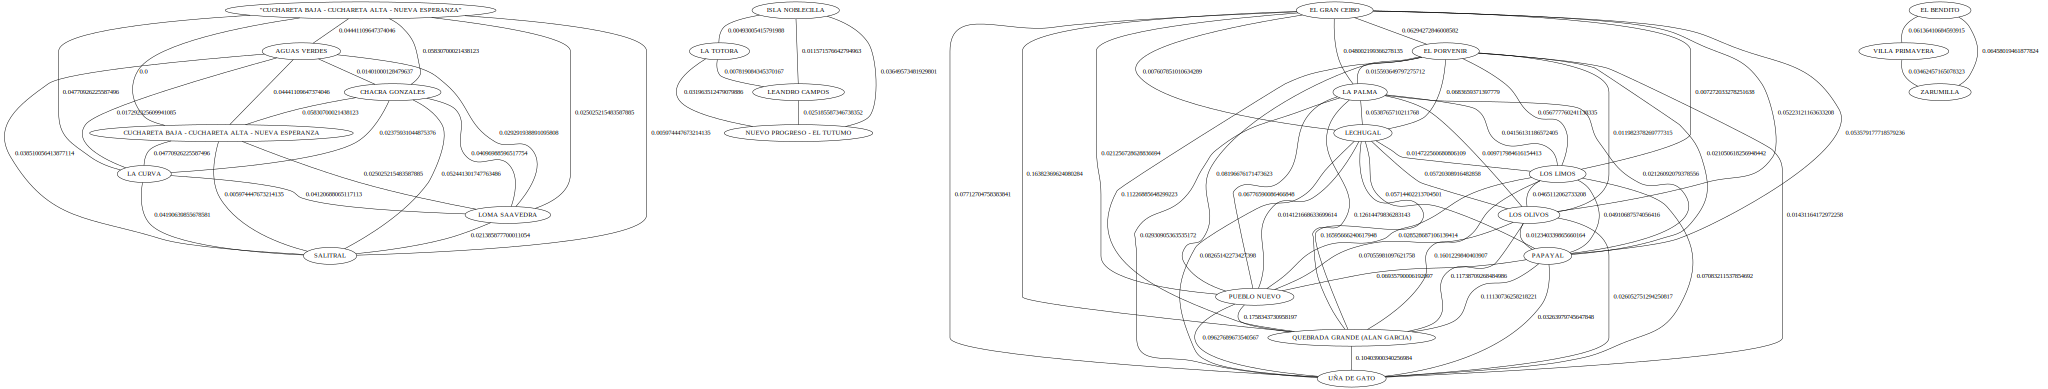

In [199]:
G=nx.Graph()
MATRIZ=[]
for i in range (len(lista_ordenada_de_distritos)):
  matriz_conex=[]
  matriz_conex=[[0 for _ in range(len(lista_ordenada_de_distritos[i]))]for _ in range (len(lista_ordenada_de_distritos[i]))]
  for j in range(len(lista_ordenada_de_distritos[i])):
    for k in range(len(lista_ordenada_de_distritos[i])):
       distancia=distancia_puntos(lista_ordenada_de_distritos[i][j],lista_ordenada_de_distritos[i][k])
       matriz_conex[j][k]=distancia
      
  MATRIZ.append(matriz_conex)
for i in range(len(lista_distrit)):
    G.add_node(lista_distrit[i][3])
for i in range(len(MATRIZ)):
  for j in range(len(MATRIZ[i])):
    for k in range(len(MATRIZ[i])):
      if (j!=k):
        G.add_edge(lista_ordenada_de_distritos[i][j][3],lista_ordenada_de_distritos[i][k][3],weight=MATRIZ[i][j][k])

for i in range(len(MATRIZ)):
  print(lista_de_nombres_distritos[i],"-> ",MATRIZ[i])
for i in range(len(MATRIZ)):
  camino=TSP(MATRIZ[i],0)
  print(f"El mejor camino para el distrito {lista_de_nombres_distritos[i]} es de {camino} km")
#for i in MATRIZ:
 # print(i)
gs.nx2gv(G,weighted=True,params={"size":"40"})